In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
numTeste = "7"
#tipoTeste = "sw"
tipoTeste = "parimpar"
df = pd.read_table("../Saidas/Teste"+numTeste+"/info_"+tipoTeste+".txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
#df.drop(df[df.Tempo < 110].index, inplace=True)
#df.drop(df[df.Tempo > 260].index, inplace=True)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,RegrasBloqueadas,BytesEnviados,Medicao
0,12,SW,29,29,0,18691527,1
1,12,HW,23,23,0,16603272,2
2,22,SW,48,51,0,107272047,2
3,22,HW,45,45,0,95924304,3
4,32,SW,70,77,0,269369031,3
5,32,HW,64,64,0,253857240,4
6,42,SW,80,101,0,515147655,4
7,42,HW,78,90,0,494647776,5
8,52,SW,104,135,0,903448911,5
9,52,HW,100,118,0,857480904,6


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

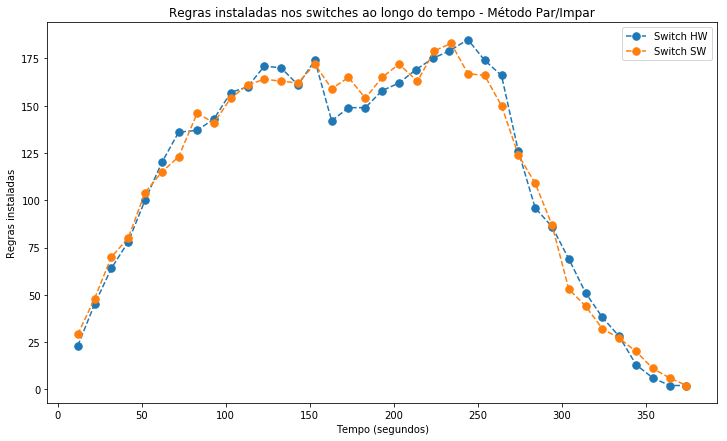

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
if(tipoTeste == "parimpar"):
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Par/Impar") #u = unicode
else:
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método SW/HW")
ax.legend()
plt.savefig('regrasInstaladas_Tempo_'+tipoTeste+'_teste'+numTeste+'.pdf')
plt.show()